# CIFAR-10, CIFAR-100 dataset introduction

CIFAR-10 and CIFAR-100 are the small image datasets with its classification labeled. It is widely used for easy image classification task/benchmark in research community.

Official page: [CIFAR-10 and CIFAR-100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html)

In Chainer, CIFAR-10 and CIFAR-100 dataset can be obtained with build-in function.

In [67]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import chainer

basedir = './src/cnn/images'

## CIFAR-10

`chainer.datasets.get_cifar10` method is prepared in Chainer to get CIFAR-10 dataset.
Dataset is automatically downloaded from https://www.cs.toronto.edu only for the first time, and its cache is used from second time.

In [68]:
CIFAR10_LABELS_DICT = [
    'airplane', 
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

train, test = chainer.datasets.get_cifar10()

The dataset structure is quite same with MNIST dataset, it is `TupleDataset`.

`train[i]` represents i-th data, there are 50000 training data.

test data structure is same, with  10000 test data.

In [69]:
print('len(train), type ', len(train), type(train))
print('len(test), type ', len(test), type(test))

len(train), type  50000 <class 'chainer.datasets.tuple_dataset.TupleDataset'>
len(test), type  10000 <class 'chainer.datasets.tuple_dataset.TupleDataset'>


`train[i]` represents i-th data, type=tuple $(x_i, y_i)$, where $ x_i $ is image data and $ y_i $ is label data.

`train[i][0]` represents $x_i$, CIFAR-10 image data,
this is 3 dimensional array, (3, 32, 32), which represents RGB channel, width 32 px, height 32 px respectively.

`train[i][1]` represents $y_i$, the label of CIFAR-10 image data (scalar),
this is scalar value whose actual label can be converted by `LABELS_DICT`.

Let's see 0-th data, `train[0]`, in detail.

In [70]:
print('train[0]', type(train[0]), len(train[0]))

x0, y0 = train[0]
print('train[0][0]', x0.shape, x0)
print('train[0][1]', y0.shape, y0, '->', CIFAR10_LABELS_DICT[y0])

train[0] <class 'tuple'> 2
train[0][0] (3, 32, 32) [[[ 0.23137257  0.16862746  0.19607845 ...,  0.61960787  0.59607846
    0.58039218]
  [ 0.0627451   0.          0.07058824 ...,  0.48235297  0.4666667
    0.4784314 ]
  [ 0.09803922  0.0627451   0.19215688 ...,  0.46274513  0.47058827
    0.42745101]
  ..., 
  [ 0.81568635  0.78823537  0.77647066 ...,  0.627451    0.21960786
    0.20784315]
  [ 0.70588237  0.67843139  0.72941178 ...,  0.72156864  0.38039219
    0.32549021]
  [ 0.69411767  0.65882355  0.7019608  ...,  0.84705889  0.59215689
    0.48235297]]

 [[ 0.24313727  0.18039216  0.18823531 ...,  0.51764709  0.49019611
    0.48627454]
  [ 0.07843138  0.          0.03137255 ...,  0.34509805  0.32549021
    0.34117648]
  [ 0.09411766  0.02745098  0.10588236 ...,  0.32941177  0.32941177
    0.28627452]
  ..., 
  [ 0.66666669  0.60000002  0.63137257 ...,  0.52156866  0.12156864
    0.13333334]
  [ 0.54509807  0.48235297  0.56470591 ...,  0.58039218  0.24313727
    0.20784315]
  [ 0.56

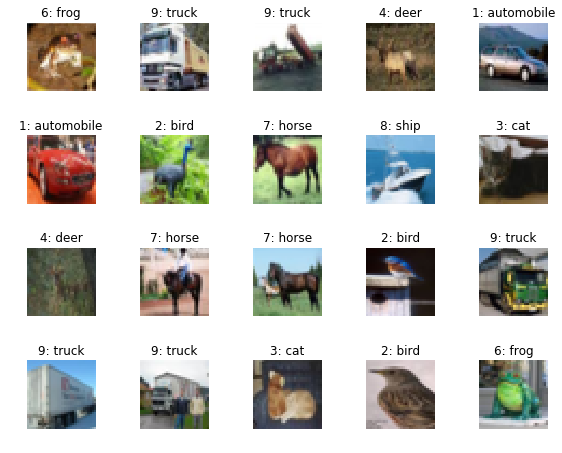

In [71]:
def plot_cifar(filepath, data, row, col, scale=3., label_dict=None):
    fig_width = data[0][0].shape[1] / 80 * row * scale
    fig_height = data[0][0].shape[2] / 80 * col * scale
    fig, axes = plt.subplots(row, 
                             col, 
                             figsize=(fig_height, fig_width))
    for i in range(row * col):
        # train[i][0] is i-th image data with size 32x32
        image, label_index = data[i]
        image = image.transpose(1, 2, 0)
        r, c = divmod(i, col)
        axes[r][c].imshow(image)  # cmap='gray' is for black and white picture.
        if label_dict is None:
            axes[r][c].set_title('label {}'.format(label_index))
        else:
            axes[r][c].set_title('{}: {}'.format(label_index, CIFAR10_LABELS_DICT[label_index]))
        axes[r][c].axis('off')  # do not show axis value
    plt.tight_layout()   # automatic padding between subplots
    plt.savefig(filepath)

plot_cifar(os.path.join(basedir, 'cifar10_plot.png'), train, 4, 5, 
           scale=4., label_dict=CIFAR10_LABELS_DICT)
plot_cifar(os.path.join(basedir, 'cifar10_plot_more.png'), train, 10, 10, 
           scale=4., label_dict=CIFAR10_LABELS_DICT)

## CIFAR-100

CIFAR-100 is really similar to CIFAR-10. The difference is the number of classified label is 100.
`chainer.datasets.get_cifar100` method is prepared in Chainer to get CIFAR-100 dataset.

In [79]:
CIFAR100_LABELS_DICT = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

train_cifar100, test_cifar100 = chainer.datasets.get_cifar100()

The dataset structure is quite same with MNIST dataset, it is `TupleDataset`.

`train[i]` represents i-th data, there are 50000 training data.
Total train data is same size while the number of class label increased.
So the training data for each class label is fewer than CIFAR-10 dataset.

test data structure is same, with  10000 test data.

In [80]:
print('len(train_cifar100), type ', len(train_cifar100), type(train_cifar100))
print('len(test_cifar100), type ', len(test_cifar100), type(test_cifar100))

print('train_cifar100[0]', type(train_cifar100[0]), len(train_cifar100[0]))

x0, y0 = train_cifar100[0]
print('train_cifar100[0][0]', x0.shape)  # , x0
print('train_cifar100[0][1]', y0.shape, y0)

len(train_cifar100), type  50000 <class 'chainer.datasets.tuple_dataset.TupleDataset'>
len(test_cifar100), type  10000 <class 'chainer.datasets.tuple_dataset.TupleDataset'>
train_cifar100[0] <class 'tuple'> 2
train_cifar100[0][0] (3, 32, 32)
train_cifar100[0][1] () 19


In [81]:
plot_cifar(os.path.join(basedir, 'cifar100_plot_more.png'), train, 10, 10, 
           scale=4., label_dict=CIFAR100_LABELS_DICT)

### Backup code

Extracting metadata information from CIFAR-100 dataset.
Please download CIFAR-100 dataset for python from 
https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

Extract it, and put "meta" file into proper place to execute below code.

In [77]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

metadata = unpickle(os.path.join('./src/cnn/assets', 'meta'))
print(metadata)

{'coarse_label_names': ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2'], 'fine_label_names': ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'ott